In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Loading the Dataset
df = pd.read_excel("D:\\Projects\\Personal Loan Acceptance Predictor\\data\\Bank_Personal_Loan_Modelling.xlsx",sheet_name="Data")

#General Information About The Dataset
print(df.head(10))
print(df.info())
print(df.describe())

   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   
5   6   37          13      29     92121       4    0.4          2       155   
6   7   53          27      72     91711       2    1.5          2         0   
7   8   50          24      22     93943       1    0.3          3         0   
8   9   35          10      81     90089       3    0.6          2       104   
9  10   34           9     180     93023       1    8.9          3         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0

In [3]:
#Exploratory Data Analysis

#Isolating the Feature Variables and Target Variable
target = "Personal Loan"
drop_cols = ['ID','ZIP Code']

#Assigning Feature variables to 'x'
x = df.drop(columns = drop_cols + [target])
#Assigning Target variables to 'y'
y = df[target]
print(x.head(10))
#print(y)

   Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0   25           1      49       4    1.6          1         0   
1   45          19      34       3    1.5          1         0   
2   39          15      11       1    1.0          1         0   
3   35           9     100       1    2.7          2         0   
4   35           8      45       4    1.0          2         0   
5   37          13      29       4    0.4          2       155   
6   53          27      72       2    1.5          2         0   
7   50          24      22       1    0.3          3         0   
8   35          10      81       3    0.6          2       104   
9   34           9     180       1    8.9          3         0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0        

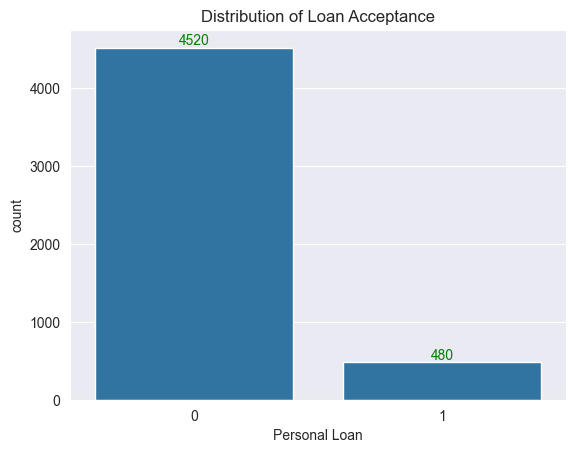

In [4]:
#Visualize Target Distribution (To See If The Target Is Balanced)

cp = sns.countplot(x='Personal Loan', data=df)
for container in cp.containers:
    cp.bar_label(container,color='green')
plt.title("Distribution of Loan Acceptance")
plt.show()

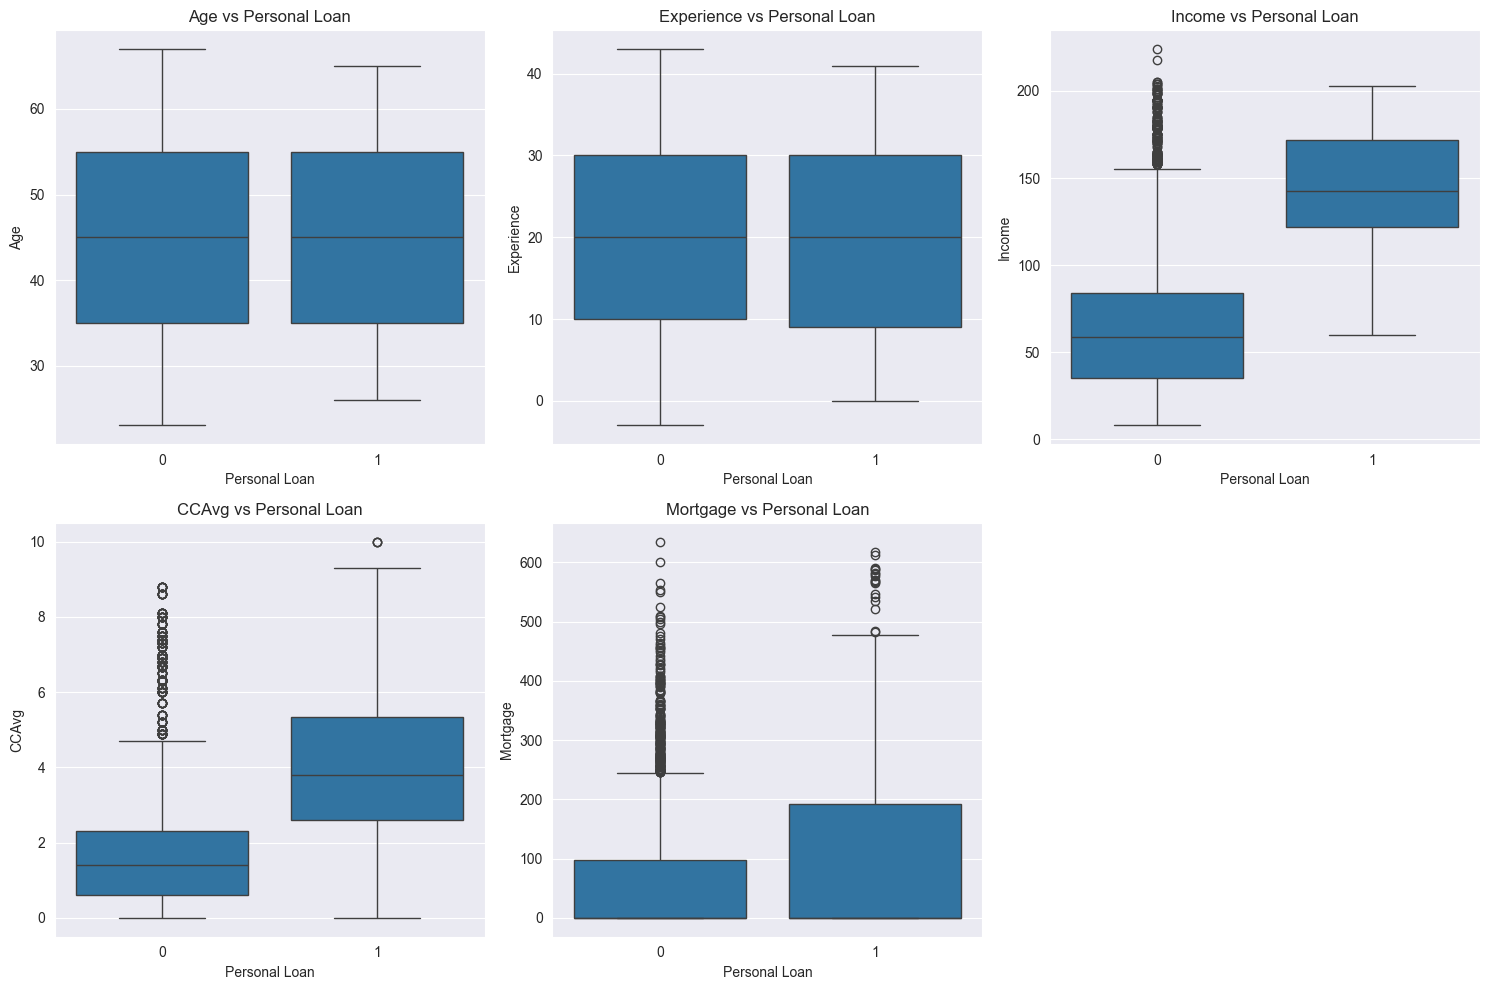

In [5]:
#Relation Of Each Numerical Feature With Target Variable

# Select only numerical columns (excluding ID and target)
num_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Personal Loan', y=col, data=df)
    plt.title(f'{col} vs Personal Loan')
plt.tight_layout()
plt.savefig("D:\\Projects\\Personal Loan Acceptance Predictor\\image\\numericFeature_vs_PersonalLoan.png")
plt.show()


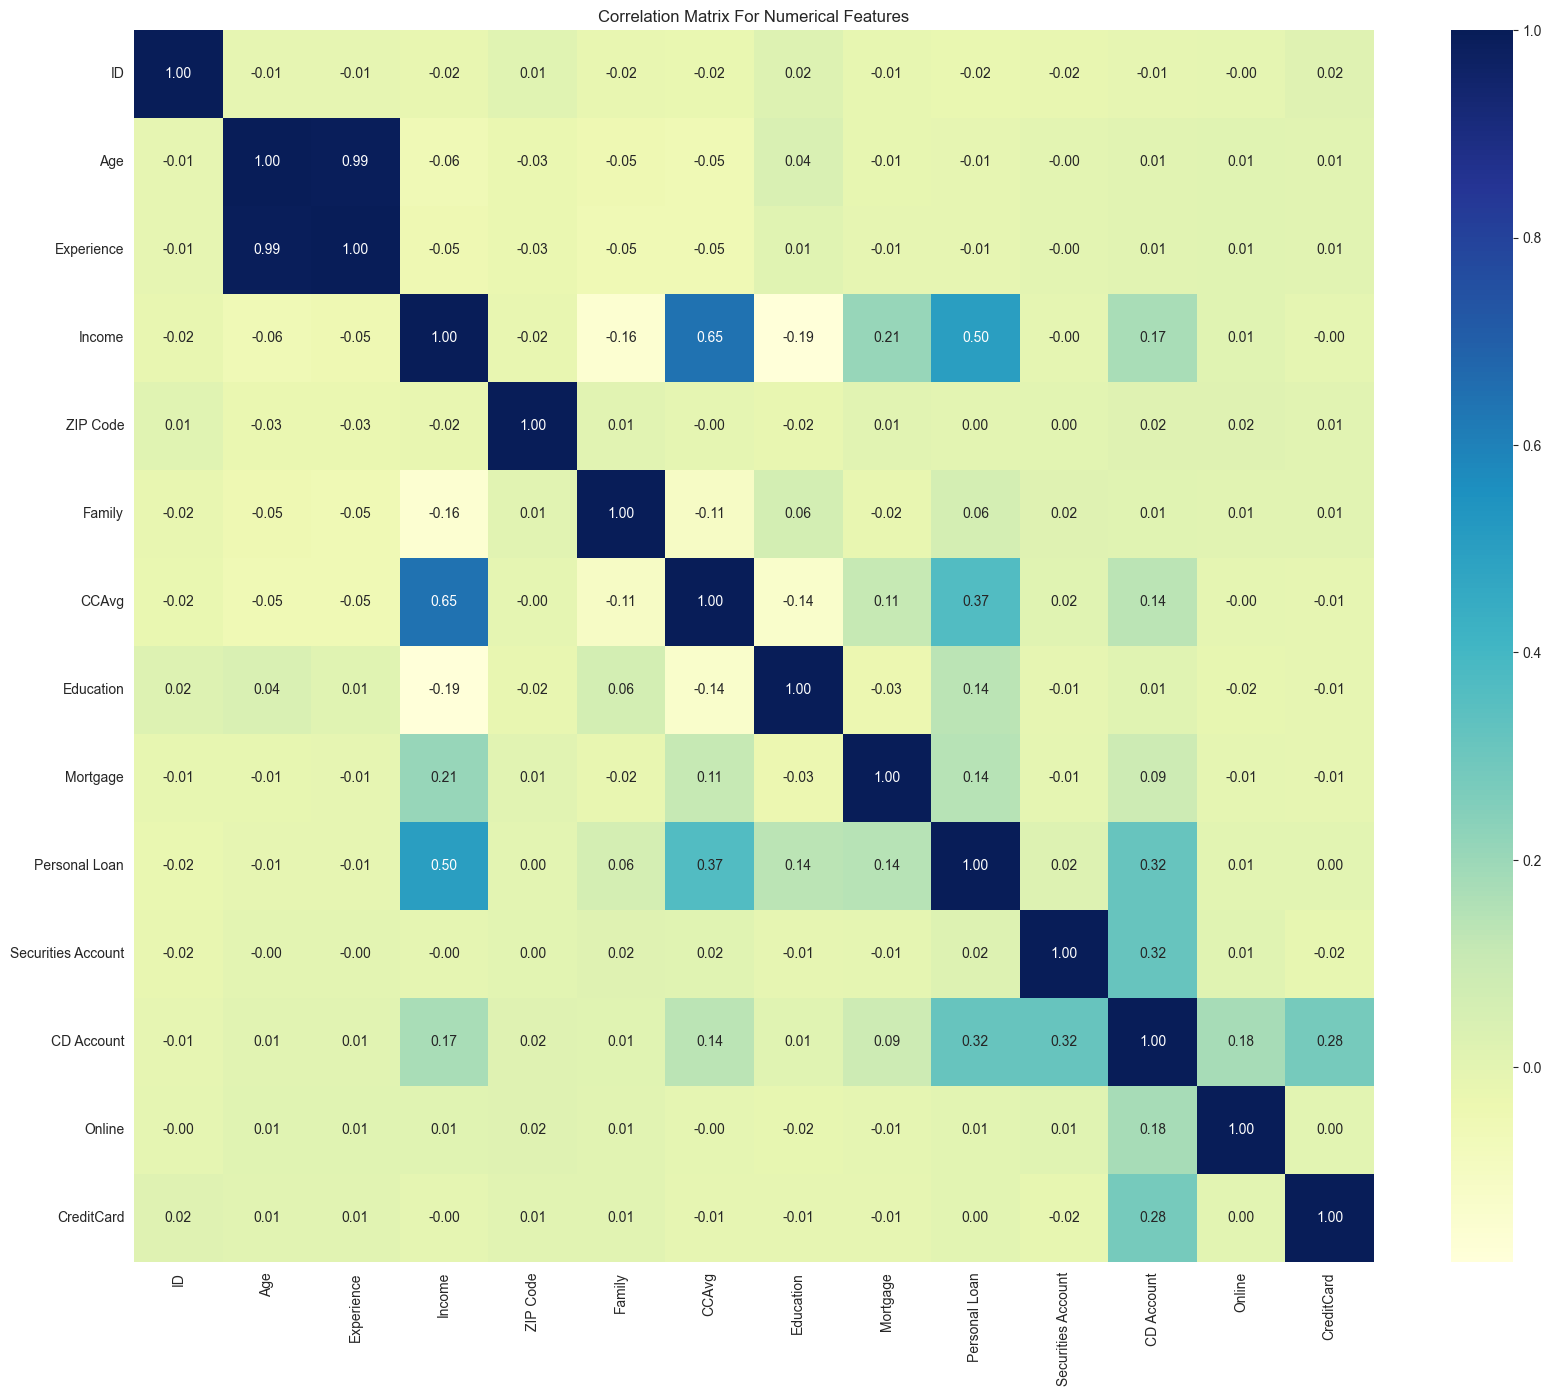

In [6]:
#Plotting Correlation Matrix For Numeric Feature Variables
corr = df.corr(numeric_only=True)
plt.figure(figsize = (20,16))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Correlation Matrix For Numerical Features")
plt.savefig("D:\\Projects\\Personal Loan Acceptance Predictor\\image\\correlation_matrix_numeric_features.png")
plt.show()

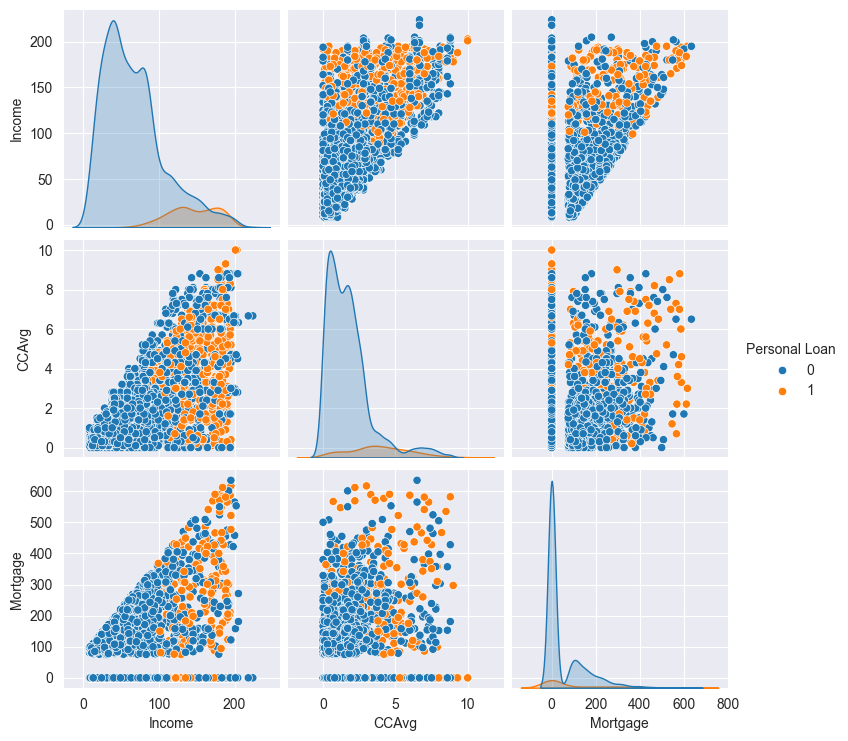

In [7]:
#Pair plot to check how numeric variables(potential features for training/testing)
#are related visually to the target.
sns.pairplot(df, vars=['Income', 'CCAvg', 'Mortgage'], hue='Personal Loan')
plt.savefig("D:\\Projects\\Personal Loan Acceptance Predictor\\image\\numeric_feature_pair_plot.png")
plt.show()

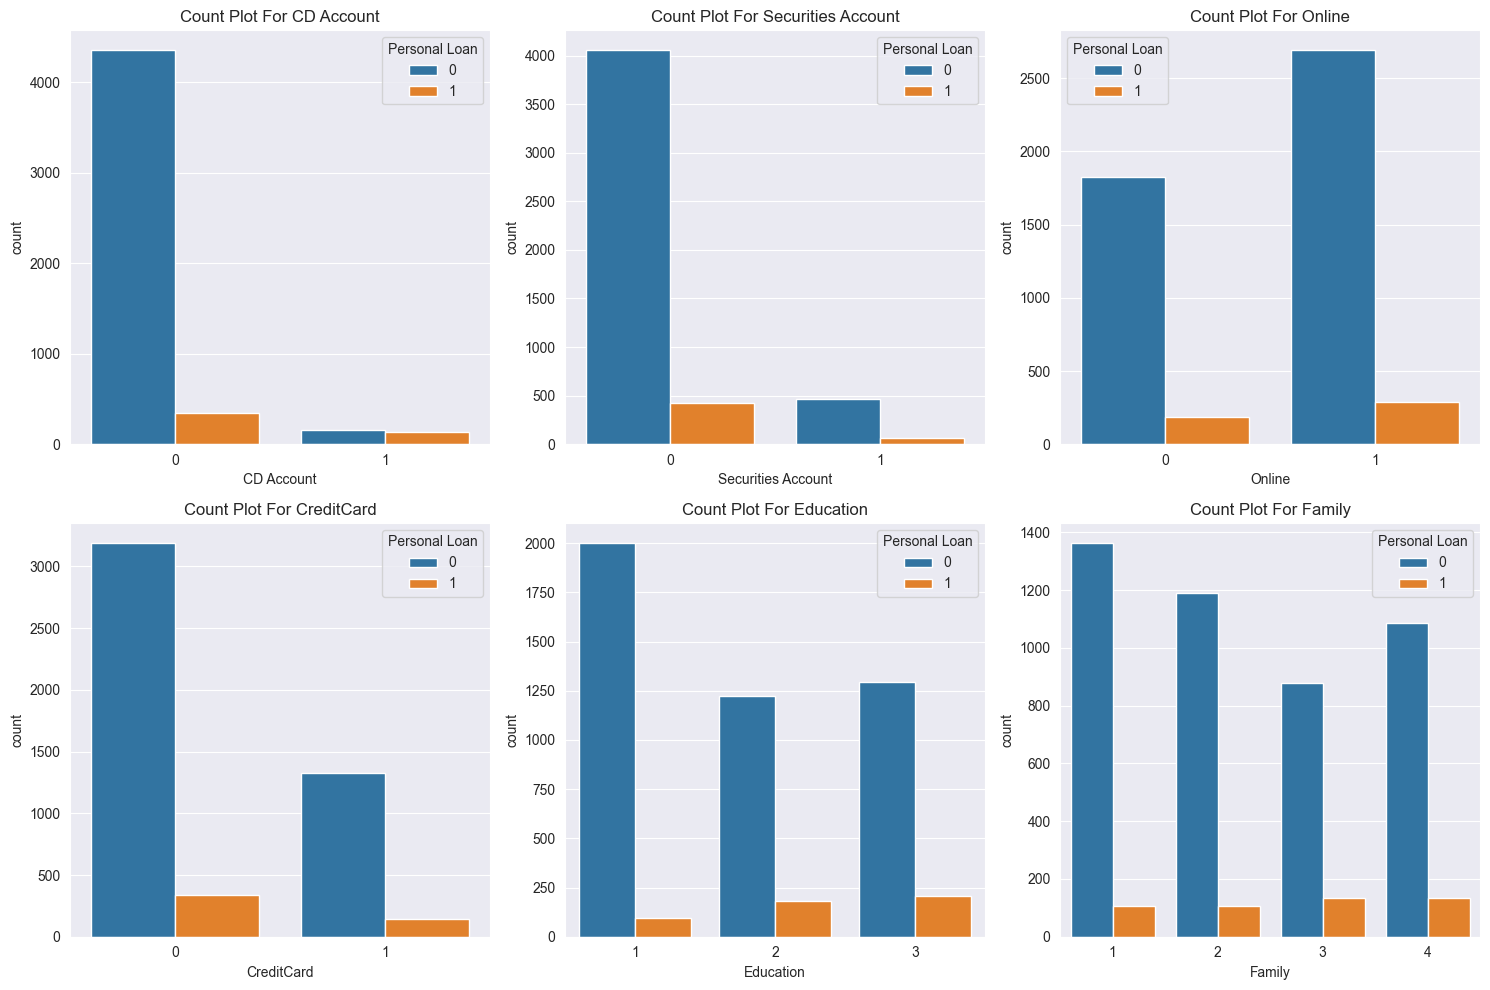

In [8]:
#Relation Of Each Categorical Feature With Target Variable

cat_features = ['CD Account', 'Securities Account', 'Online', 'CreditCard', 'Education','Family']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, hue='Personal Loan', data=df)
    plt.title(f'Count Plot For {col}')
plt.tight_layout()
plt.savefig("D:\\Projects\\Personal Loan Acceptance Predictor\\image\\categoricalFeature_vs_PersonalLoan.png")
plt.show()

In [ ]:
'''Final Feature List Based On EDA:
    Income
    CCAvg
    CD Account
    Education

   Target : Personal Loan'''